# Assignment

In this assignment you will apply various Data Science skills and techniques that you have learned as part of the previous courses.

You will assume the role of a Data Scientist who has recently joined an AI-powered weather data analytic company and be presented with a challenge that requires data collection, analysis, basic hypothesis testing, visualization, modelling, and dashboard to be performed on real-world datasets.

You will undertake the tasks of
- Collecting and understanding data from multiple sources
- Performing data wrangling
- Performing exploratory data analysis and visualization
- Performing modelling the data with linear regressions using Tidymodels
- Building an interactive dashboard using R Shiny (option)

The project will culminate with a presentation of your data analysis report, with an executive summary for the various stakeholders in the organization. You will be assessed on both your work for the various stages in the data analysis process, as well as the final deliverable.

This project is a great opportunity to showcase your Data Science skills, and demonstrate your proficiency to potential employers.


# Project Scenario

Imagine that you have just been hired by an AI-powered weather data analytics company as a data scientist.

Your first project is to analyze how weather would affect bike-sharing demand in urban areas. To complete this project, you need to first collect and process related weather and bike-sharing demand data from various sources, perform exploratory data analysis on the data, and build predictive models to predict bike-sharing demand. You will combine your results and connect them to a live dashboard displaying an interactive map and associated visualization of the current weather and the estimated bike demand.

The last assignment is creating an insightful and informative slideshow and presenting it to your peers.


# Understanding the source data

Rental bikes are available in many cities around the globe. It is important for each of these cities to provide a reliable supply of rental bikes to optimize availablity and accessibility to the public at all times. Also important is minimizing the cost of these programs, in part by minimizing the number of bikes supplied in order to meet the demand. Thus, to help optimize the supply it would be helpful to be able to predict the number of bikes required each hour of the day, based on currrent conditions such as the weather.The Seoul Bike Sharing Demand Data Set was designed for this purpose. It contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), and the number of bikes rented per hour and date.

You will use this dataset to build a linear regression model of the number of bikes rented each hour, based on the weather.

The `seoul_bike_sharing_converted_normalized.csv` will be our main dataset which has following variables:

The response variable:
- `RENTED BIKE COUNT`- Count of bikes rented at each hour

Weather predictor variables:
- `TEMPERATURE` - Temperature in Celsius
- `HUMIDITY` - Unit is `%`
- `WIND_SPEED` - Unit is `m/s`
- `VISIBILITY` - Multiplied by 10m
- `DEW_POINT_TEMPERATURE` - The temperature to which the air would have to cool down in order to reach saturation, unit is Celsius
- `SOLAR_RADIATION` - MJ/m2
- `RAINFALL` - mm
- `SNOWFALL` - cm

Date/time predictor variables:
- `DATE` - Year-month-day
- `HOUR`- Hour of he day
- `FUNCTIONAL DAY` - NoFunc(Non Functional Hours), Fun(Functional hours)
- `HOLIDAY` - Holiday/No holiday
- `SEASONS` - Winter, Spring, Summer, Autumn



### Relevant Paper and Citation Request:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho.
Using data mining techniques for bike sharing demand prediction in metropolitan city. Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho.
A rule-based model for Seoul Bike sharing demand prediction using weather data European Journal of Remote Sensing, pp. 1-18, Feb, 2020
- V E, Sathishkumar (2020), “Seoul Bike Sharing Demand Prediction”, Mendeley Data, V2, doi: 10.17632/zbdtzxcxvg.2



# Next Steps: Predict Bike-Sharing Demand Using Regression Models

Now that you have performed exploratory and visual analysis on the bike sharing demand datasets and obtained some preliminary insights on the attributes, it’s time to build, evaluate, and refine several predictive models and find the best performing model for predicting hourly bike rent count.

We will help your model building and evaluation process via the following instructional labs:

LAB: Predict Hourly Rented Bike Count using Basic Linear Regression Models (90 mins):

- TASK: Split data into training and testing datasets
- TASK: Build a linear regression model using only the weather variables
- TASK: Build a linear regression model using both weather and date/time variables
- TASK: Evaluate the models and identify important variables

LAB: Refine the Baseline Regression Models (120 mins):

- TASK: Add higher order terms
- TASK: Add interaction terms
- TASK: Add regularization
- TASK: Experiment to find the best performed model

In [3]:
# Download several datasets

# Download raw_bike_sharing_systems.csv
# url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_bike_sharing_systems.csv"
# download.file(url, destfile = "raw_bike_sharing_systems.csv")

# Download raw_cities_weather_forecast.csv
# url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_cities_weather_forecast.csv"
# download.file(url, destfile = "raw_cities_weather_forecast.csv")

# Download raw_worldcities.csv
# url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_worldcities.csv"
# download.file(url, destfile = "raw_worldcities.csv")

# Download raw_seoul_bike_sharing.csv
url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_seoul_bike_sharing.csv"
download.file(url, destfile = "raw_seoul_bike_sharing.csv")

In [4]:
install.packages("tidymodels")
# install.packages("tidyverse")
# install.packages("stringr")
library("tidymodels")
library("tidyverse")
library("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
install.packages("stringr")
library(stringr)
# Read dataset
bike_sharing_df <- read.csv("raw_seoul_bike_sharing.csv")
# Standardized its columns:
bike_sharing_df[,2:11] <- scale(bike_sharing_df[,2:11])

# Convert all column names to uppercase

names(bike_sharing_df) <- toupper(names(bike_sharing_df))
# Replace any white space separators by underscores, using the str_replace_all function
names(bike_sharing_df) <- str_replace_all(names(bike_sharing_df),' ', '_')
# Save the dataset
write.csv(bike_sharing_df, "raw_seoul_bike_sharing.csv", row.names=FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
bike_sharing_df <- read.csv("raw_seoul_bike_sharing.csv")
bike_sharing_df <- bike_sharing_df %>% select(-DATE, -FUNCTIONING_DAY)
head(bike_sharing_df)

,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,-0.7397153,-1.6612299,-1.512657,-1.0424234,0.4584496,0.9258185,-1.659510,-0.6550943,-0.1317924,-0.1718813,Winter,No Holiday
2,-0.8175544,-1.5167752,-1.537774,-0.9933133,-0.8925105,0.9258185,-1.659510,-0.6550943,-0.1317924,-0.1718813,Winter,No Holiday
3,-0.8658146,-1.3723204,-1.579637,-0.9442032,-0.6995162,0.9258185,-1.667167,-0.6550943,-0.1317924,-0.1718813,Winter,No Holiday
4,-0.9685621,-1.2278656,-1.596382,-0.8950931,-0.7960134,0.9258185,-1.659510,-0.6550943,-0.1317924,-0.1718813,Winter,No Holiday
5,-1.0137088,-1.0834108,-1.579637,-1.0915335,0.5549468,0.9258185,-1.736077,-0.6550943,-0.1317924,-0.1718813,Winter,No Holiday
6,-0.9794596,-0.9389561,-1.613127,-1.0424234,-0.2170305,0.9258185,-1.743734,-0.6550943,-0.1317924,-0.1718813,Winter,No Holiday



#### TASK: Split training and testing data
First, we need to split the full dataset into training and testing datasets.

The training dataset will be used for fitting regression models, and the testing dataset will be used to evaluate the trained models.

TODO: Use the initial_split(), training(), and testing() functions to generate a training dataset consisting of 75% of the original dataset, and a testing dataset using the remaining 25%.

In [78]:
# install.packages("tidymodels")
# library(tidymodels)
# Use the `initial_split()`, `training()`, and `testing()` functions to split the dataset
# With seed 1234
# prop = 3/4
# train_data
# test_data
set.seed(1234)
initial_split(bike_sharing_df, prop = 3/4, strata = NULL, breaks = 4, pool = 0.1)
rate_split <- initial_split(bike_sharing_df)
train_data <- training(rate_split)
test_data <- testing(rate_split)
true_value <- test_data$RENTED_BIKE_COUNT

dim(train_data)
dim(test_data)

<Training/Testing/Total>
<6570/2190/8760>

[1] 6570   12

[1] 2190   12

# TASK: Build a linear regression model using weather variables only
As you could imagine, weather conditions may affect people's bike renting decisions. For example, on a cold and rainy day, you may choose alternate transportation such as a bus or taxi. While on a nice sunny day, you may want to rent a bike for a short-distance travel.

Thus, can we predict a city's bike-sharing demand based on its local weather information? Let's try to build a regression model to do that.

_TODO:_ Build a linear regression model called `lm_model_weather` using the following variables:

- `TEMPERATURE` - Temperature in Celsius
- `HUMIDITY` - Unit is `%`
- `WIND_SPEED` - Unit is `m/s`
- `VISIBILITY` - Multiplied by 10m
- `DEW_POINT_TEMPERATURE` - The temperature to which the air would have to cool down in order to reach saturation, unit is Celsius
- `SOLAR_RADIATION` - MJ/m2
- `RAINFALL` - mm
- `SNOWFALL` - cm


In [92]:
# Use `linear_reg()` with engine `lm` and mode `regression`
lm_model_weather <- linear_reg(mode = "regression", engine = "lm")
lm_model_weather <- lm_model_weather %>% fit(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY
                                    + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,
                                    data = train_data)
lm_model_weather

parsnip model object


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Coefficients:
          (Intercept)            TEMPERATURE               HUMIDITY  
            -0.002601               0.621681              -0.358547  
           WIND_SPEED             VISIBILITY  DEW_POINT_TEMPERATURE  
             0.089669               0.004242               0.059353  
      SOLAR_RADIATION               RAINFALL               SNOWFALL  
            -0.155358              -0.089284               0.026705  


In [81]:
# Using lm() function
linear_model_weather <- lm(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY
                        + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,
                        data = train_data)

linear_model_weather


Call:
lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + 
    VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + 
    SNOWFALL, data = train_data)

Coefficients:
          (Intercept)            TEMPERATURE               HUMIDITY  
            -0.002601               0.621681              -0.358547  
           WIND_SPEED             VISIBILITY  DEW_POINT_TEMPERATURE  
             0.089669               0.004242               0.059353  
      SOLAR_RADIATION               RAINFALL               SNOWFALL  
            -0.155358              -0.089284               0.026705  


Fit a model with the response variable RENTED_BIKE_COUNT and predictor variables TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL

In [90]:
# Fit the model called `lm_model_weather`
# RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,  with the training data

# lm_model_weather <- lm(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY
#                         + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,
#                         data = train_data)

Print the fit summary for the lm_model_weather model.

In [93]:
print(lm_model_weather$fit$coefficient)

          (Intercept)           TEMPERATURE              HUMIDITY 
         -0.002601482           0.621681109          -0.358546984 
           WIND_SPEED            VISIBILITY DEW_POINT_TEMPERATURE 
          0.089669349           0.004242136           0.059353353 
      SOLAR_RADIATION              RAINFALL              SNOWFALL 
         -0.155358112          -0.089283820           0.026704506 


# TASK: Build a linear regression model using all variables


In addition to weather, there could be other factors that may affect bike rental demand, such as the time of a day or if today is a holiday or not.

Next, let's build a linear regression model using all variables (weather + date/time) in this task.

_TODO:_ Build a linear regression model called `lm_model_all` using all variables `RENTED_BIKE_COUNT ~ .`

In [94]:
# Fit the model called `lm_model_all`
# `RENTED_BIKE_COUNT ~ .` means use all other variables except for the response variable
lm_model_all <- linear_reg(mode = "regression", engine = "lm")
# lm_model_all <- lm(RENTED_BIKE_COUNT ~ ., data = train_data)
lm_model_all <- lm_model_all %>% fit(RENTED_BIKE_COUNT ~ ., data = train_data)

Print the fit summary for lm_model_all.

In [95]:
summary(lm_model_all$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9685 -0.4208 -0.0831  0.3298  3.2873 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.096146   0.042462   2.264  0.02359 *  
HOUR                   0.318638   0.009311  34.223  < 2e-16 ***
TEMPERATURE            0.248222   0.078675   3.155  0.00161 ** 
HUMIDITY              -0.377530   0.037503 -10.067  < 2e-16 ***
WIND_SPEED             0.026957   0.009678   2.785  0.00536 ** 
VISIBILITY             0.007280   0.010938   0.666  0.50573    
DEW_POINT_TEMPERATURE  0.285269   0.089821   3.176  0.00150 ** 
SOLAR_RADIATION       -0.106166   0.011930  -8.899  < 2e-16 ***
RAINFALL              -0.102855   0.008323 -12.358  < 2e-16 ***
SNOWFALL               0.026319   0.008946   2.942  0.00327 ** 
SEASONSSpring         -0.208083   0.025360  -8.205 2.76e-16 ***
SEASONSSummer         -0.253017   0.031145  -8.124 5.38e-16 

# TASK: Model evaluation and identification of important variables

Now that you have built two regression models, lm_model_weather and lm_model_all, with different predictor variables, you need to compare their performance to see which one is better.

In this project, we will use two important metrics that are often used in Statistics to determine the performance of a model:

1.  R^2 / R-squared
2.  Root Mean Squared Error (RMSE)

**R-squared**

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

**Root Mean Squared Error (RMSE)**
$$
RMSE = \sqrt{MSE}
$$

As you know, the Mean Squared Error measures the average of the squares of errors, where 'error' is the difference between the actual value ($y$) and the estimated value ($ŷ$).
Another metric that is related to MSE is **Root Mean Squared Error (RMSE)** and is simply the square root of MSE.


We first need to test the `lm_model_weather` and `lm_model_all` models against the test dataset `test_data`, and generate `RENTED_BIKE_COUNT` prediction results.


_TODO:_ Make predictions on the testing dataset using both `lm_model_weather` and `lm_model_all` models

In [101]:
# Use predict() function to generate test results for `lm_model_weather` and `lm_model_all`
# and generate two test results dataframe with a truth column:

# test_results_weather for lm_model_weather model
# test_results_weather<-predict(lm_model_weather, test_data)

test_results_weather <- predict(lm_model_weather, test_data)

# test_results_all for lm_model_all

# test_results_all<-predict(lm_model_all, test_data)
test_results_all <- predict(lm_model_all, test_data)

# Create test results dataframe for both
Result <- data.frame(Truth = test_data$RENTED_BIKE_COUNT,
                    Predicted_Weather = test_results_weather$.pred,
                    Predicted_all = test_results_all$.pred)


Next, let's calculate and print the R-squared and RMSE for the two test results

_TODO:_ Use `rsq()` and `rmse()` functions to calculate R-squared and RMSE metrics for the two test results


In [53]:
# Calculate R-squared and RMSE using summary statistics for lm_model_weather
rsq_weather <- summary(lm_model_weather)$r.squared
rmse_weather <- sqrt(mean(lm_model_weather$residuals^2))

# Calculate R-squared and RMSE using summary statistics for lm_model_all
rsq_all <- summary(lm_model_all)$r.squared
rmse_all <- sqrt(mean(lm_model_all$residuals^2))

# Self-defined functions for R-squared and RMSE
R2 <- function(y_actual, y_predict) {
  return(cor(y_actual, y_predict)^2)
}

RMSE <- function(y_actual, y_predict) {
  return(sqrt(mean((y_actual - y_predict)^2)))
}

# Evaluation of models
y_weather <- predict(lm_model_weather, test_data)
R2_weather <- R2(test_data$RENTED_BIKE_COUNT, y_weather)
RMSE_weather <- RMSE(test_data$RENTED_BIKE_COUNT, y_weather)

y_all <- predict(lm_model_all, test_data)
R2_all <- R2(test_data$RENTED_BIKE_COUNT, y_all)
RMSE_all <- RMSE(test_data$RENTED_BIKE_COUNT, y_all)


In [124]:
# rsq_weather <- rsq(...)
# rsq_all <- rsq(...)

# rmse_weather <- rmse(...)
# rmse_all <- rmse(...)


#

rmse <- sqrt(mean(lm_model_weather$fit$residuals^2))
rmse

summary(lm_model_weather$fit)$r.squared


#-------------self-defined function --------------------------------

#R SQUARED error metric -- Coefficient of Determination
R2 = function(y_actual,y_predict){
  cor(y_actual,y_predict)^2
}

# RMSE calculation

RMSE=function(y_actual,y_predict){
  sqrt(mean((y_actual - y_predict)^2))
}

#--------------------Evaluatation of models----------------------------
true_value <- test_data$RENTED_BIKE_COUNT

y_weather=predict(lm_model_weather,test_data)
R2_weather=R2(true_value, y_weather$.pred)
RMSE_weather=RMSE(true_value, y_weather$.pred)


y_all=predict(lm_model_all,test_data)
R2_all=R2(true_value, y_all$.pred)
RMSE_all=RMSE(true_value, y_all$.pred)

[1] 0.7517113

[1] 0.4278769

From these tables, you should find that the test results from lm_model_all are much better. It means that using both weather and datetime variables in the model generates better prediction results.

Since lm_model_all has many predictor variables, let's check which predictor variables have larger coefficients. Variables with larger coefficients in the model means they attribute more in the prediction of RENTED_BIKE_COUNT. In addition, since all predictor variables are normalized to the same scale, 0 to 1, we thus can compare their coefficients directly.

You could try building another regression model using the non-normalized seoul_bike_sharing_converted.csv dataset, and you would find that the coefficients are much different.

First let's print all coefficients:

In [129]:
lm_model_all$fit$coefficients

(Intercept)                  HOUR           TEMPERATURE 
          0.096146270           0.318637696           0.248222123 
             HUMIDITY            WIND_SPEED            VISIBILITY 
         -0.377529508           0.026957324           0.007279552 
DEW_POINT_TEMPERATURE       SOLAR_RADIATION              RAINFALL 
          0.285268826          -0.106165732          -0.102854895 
             SNOWFALL         SEASONSSpring         SEASONSSummer 
          0.026318721          -0.208083296          -0.253016536 
        SEASONSWinter     HOLIDAYNo Holiday 
         -0.588202172           0.179981259

It's not very clear to compare the coefficients from a long and unsorted list. Next, you need to sort and visualize them using a bar chart

_TODO:_

- Sort the coefficient list in descending order



In [128]:
# Sort coefficient list
sorted <- sort(lm_model_all$fit$coefficients, decreasing = TRUE)

# Refine the Baseline Regression Models

## Lab Overview:

Now you have built a baseline regression model with some relatively good RMSE and R-squared reported values. However, we could still improve it by using methods like adding polynomial and interaction terms

In this lab, you will be asked to continue using `tidymodels` to improve the performance of baseline model:

- **TASK: Add polynomial terms**
- **TASK: Add interactions terms**


Let's start!

# TASK: Add polynomial terms

Linear regression models are the most suitable models to capture the linear correlations among variables. However, in real world data, many relationships may be non-linear.

For example, the correlation between RENTED_BIKE_COUNT and TEMPERATURE does not look like linear:

Warning message:
“Removed 222 rows containing missing values or values outside the scale range
(`geom_point()`).”


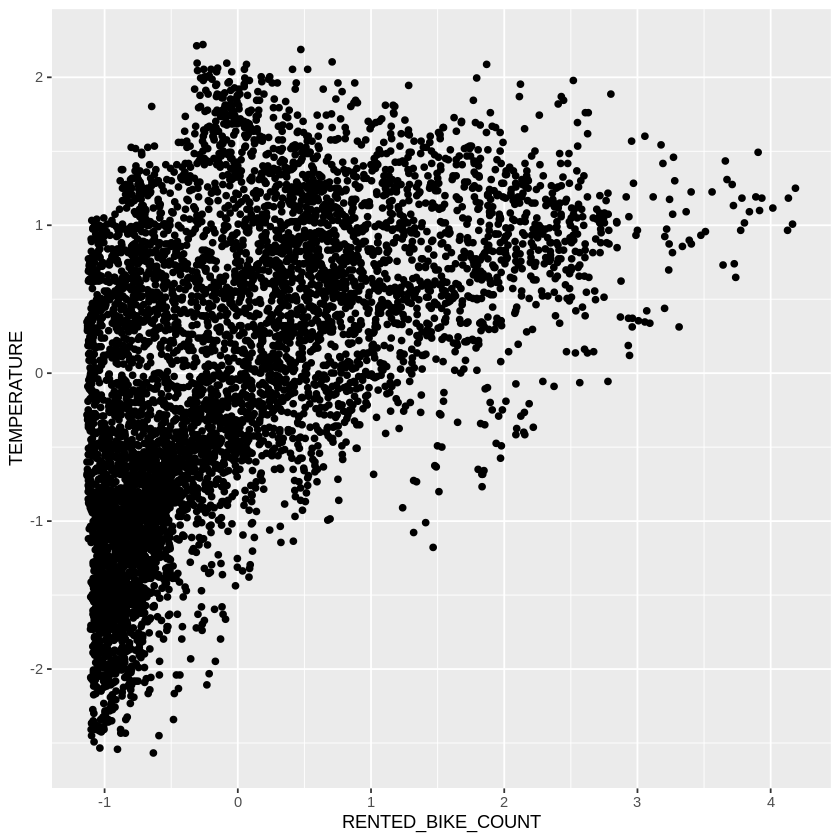

In [130]:
ggplot(data = train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) +
    geom_point()

In [132]:
# Fit a linear model with higher order polynomial on some important variables
lm_poly <- linear_reg(mode = "regression", engine = "lm")
lm_poly <-lm_poly %>%  fit(RENTED_BIKE_COUNT ~ poly(x=TEMPERATURE, 6,raw=TRUE) + poly(HUMIDITY, 4)
                           + poly(WIND_SPEED, 4) + poly(VISIBILITY, 2), data = train_data)


In [134]:
# Print model summary

summary(lm_poly$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(x = TEMPERATURE, 
    6, raw = TRUE) + poly(HUMIDITY, 4) + poly(WIND_SPEED, 4) + 
    poly(VISIBILITY, 2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7636 -0.4362 -0.1139  0.3006  3.1046 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.076935   0.017722   4.341 1.44e-05
poly(x = TEMPERATURE, 6, raw = TRUE)1   0.891604   0.029748  29.972  < 2e-16
poly(x = TEMPERATURE, 6, raw = TRUE)2   0.056674   0.044815   1.265 0.206058
poly(x = TEMPERATURE, 6, raw = TRUE)3  -0.181788   0.029648  -6.132 9.23e-10
poly(x = TEMPERATURE, 6, raw = TRUE)4  -0.110004   0.026534  -4.146 3.43e-05
poly(x = TEMPERATURE, 6, raw = TRUE)5   0.006373   0.006441   0.989 0.322548
poly(x = TEMPERATURE, 6, raw = TRUE)6   0.011130   0.004220   2.638 0.008366
poly(HUMIDITY, 4)1                    -25.629232   0.943592 -27.161  < 2e-16
poly(HUMIDITY, 4)2        

_TODO:_ Make predictions on test dataset using the `lm_poly` models

In [138]:
# Use predict() function to generate test results for `lm_poly`

y_lm_poly <- predict(lm_poly,test_data)
head(y_lm_poly)

.pred
<dbl>
-0.8268976
-0.9141781
-0.8887912
-0.9607150
-0.6413852
-0.9925705


In [137]:
#Another minor improvement we could do here is to convert all negative prediction results to zero,
#because we can not have negative rented bike counts

# e.g., y_lm_poly[y_lm_poly<0] <- 0
y_lm_poly[y_lm_poly<0] <- 0
head(y_lm_poly)

.pred
<dbl>
0
0
0
0
0
0


In [141]:
# Calculate R-squared and RMSE from the test results
R2_poly=R2(true_value, y_lm_poly$.pred)
RMSE_poly=RMSE(true_value, y_lm_poly$.pred)
R2_poly
RMSE_poly

[1] NA

[1] NA

# TASK: Add interaction terms

In real-world scenarios, in addition to non-linear relationships between response variables and predictor variables, you may also encounter relationships among variables called interaction effects.

For example, the effect of predictor variable TEMPERATURE on RENTED_BIKE_COUNT may also depend on other variables such as HUMIDITY, RAINFALL, or both (they interact) and the effect of SEASON on RENTED_BIKE_COUNT may also depend on HOLIDAY, HOUR, or both.

To capture such interaction effects, we could add some interaction terms such as RAINFALL*HUMIDITY to the regression model, similar to what we did with polynominal terms. In this task, you will explore and conduct some experiments to search for interaction terms which will improve the model performance.

_TODO:_ Try adding some interaction terms to the previous polynomial models.

In [144]:
# Add interaction terms to the poly regression built in previous step

# HINT: You could use `*` operator to create interaction terms such as HUMIDITY*TEMPERATURE and make the formula look like:
# RENTED_BIKE_COUNT ~ RAINFALL*HUMIDITY ...


lm_inter <- linear_reg(mode = "regression", engine = "lm")
lm_inter <-lm_inter %>%  fit(RENTED_BIKE_COUNT ~ RAINFALL*HUMIDITY*RAINFALL +  TEMPERATURE + HUMIDITY + WIND_SPEED +
                               VISIBILITY  + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL, data = train_data)
lm_inter

parsnip model object


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ RAINFALL * HUMIDITY * 
    RAINFALL + TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + 
    DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL, 
    data = data)

Coefficients:
          (Intercept)               RAINFALL               HUMIDITY  
            -0.130759              -1.104549              -0.275213  
          TEMPERATURE             WIND_SPEED             VISIBILITY  
             0.634891               0.094095               0.003137  
DEW_POINT_TEMPERATURE        SOLAR_RADIATION               SNOWFALL  
             0.044542              -0.156813               0.028265  
    RAINFALL:HUMIDITY  
             0.537668  


In [145]:
# Print model summary

summary(lm_inter$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ RAINFALL * HUMIDITY * 
    RAINFALL + TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + 
    DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1559 -0.4589 -0.0921  0.3220  3.3450 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.130759   0.024026  -5.442 5.45e-08 ***
RAINFALL              -1.104549   0.175335  -6.300 3.18e-10 ***
HUMIDITY              -0.275213   0.044027  -6.251 4.34e-10 ***
TEMPERATURE            0.634891   0.086314   7.356 2.14e-13 ***
WIND_SPEED             0.094095   0.010383   9.063  < 2e-16 ***
VISIBILITY             0.003137   0.011685   0.268   0.7883    
DEW_POINT_TEMPERATURE  0.044542   0.099562   0.447   0.6546    
SOLAR_RADIATION       -0.156813   0.013172 -11.905  < 2e-16 ***
SNOWFALL               0.028265   0.009870   2.864   0.0042 ** 
RAINFALL:HUMIDITY      0.5376

In [146]:
# Calculate R-squared and RMSE for the new model to see if performance has improved


test_inter=predict(lm_inter,test_data)


R2_inter=R2(true_value, test_inter$.pred)
RMSE_inter=RMSE(true_value, test_inter$.pred)
R2_inter
RMSE_inter

[1] NA

[1] NA